## Credit Card Customer Segmentation

The idea of the project is to divide credit card users into credit card usage and spending groups in order to apply different strategies to these groups



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Primary data analysis

In [2]:
customers = pd.read_csv('customer_segmentation.csv')
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [3]:
customers.shape

(10127, 14)

In [4]:
#check datatypes
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [5]:
#check for missing values
customers.isnull().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

<AxesSubplot:>

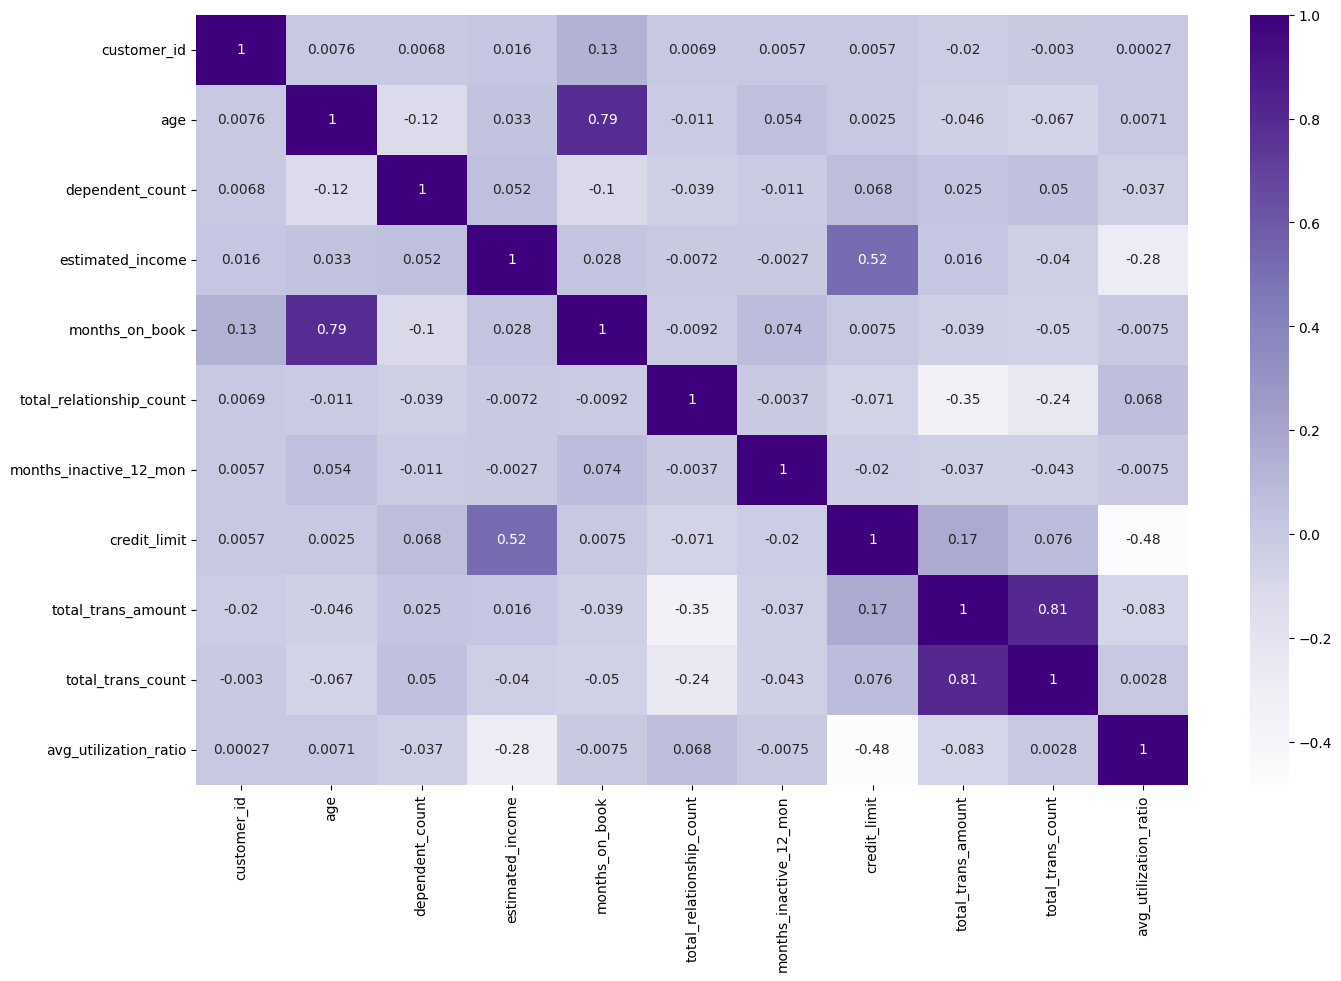

In [6]:
plt.figure(figsize=(16,10))
correlations = customers.corr()
sns.heatmap(correlations, annot=True, cmap = 'Purples')

Some conclusions can be drawn from the correlation graph
* Column ```months_on_book``` have a strong positive correlation with ```age```
* The ```credit_limit``` column has a medium correlation with the ```estimated_income``` column
* Also column ```credit_limit``` has a negative average correlation with column ```avg_utilization_ratio```
* Column ```total_trans_count``` has a strong corelation with column ``` total_trans_amount```
In the future it may be necessary to pay attention to the choice of the number of clusters taking into account these data


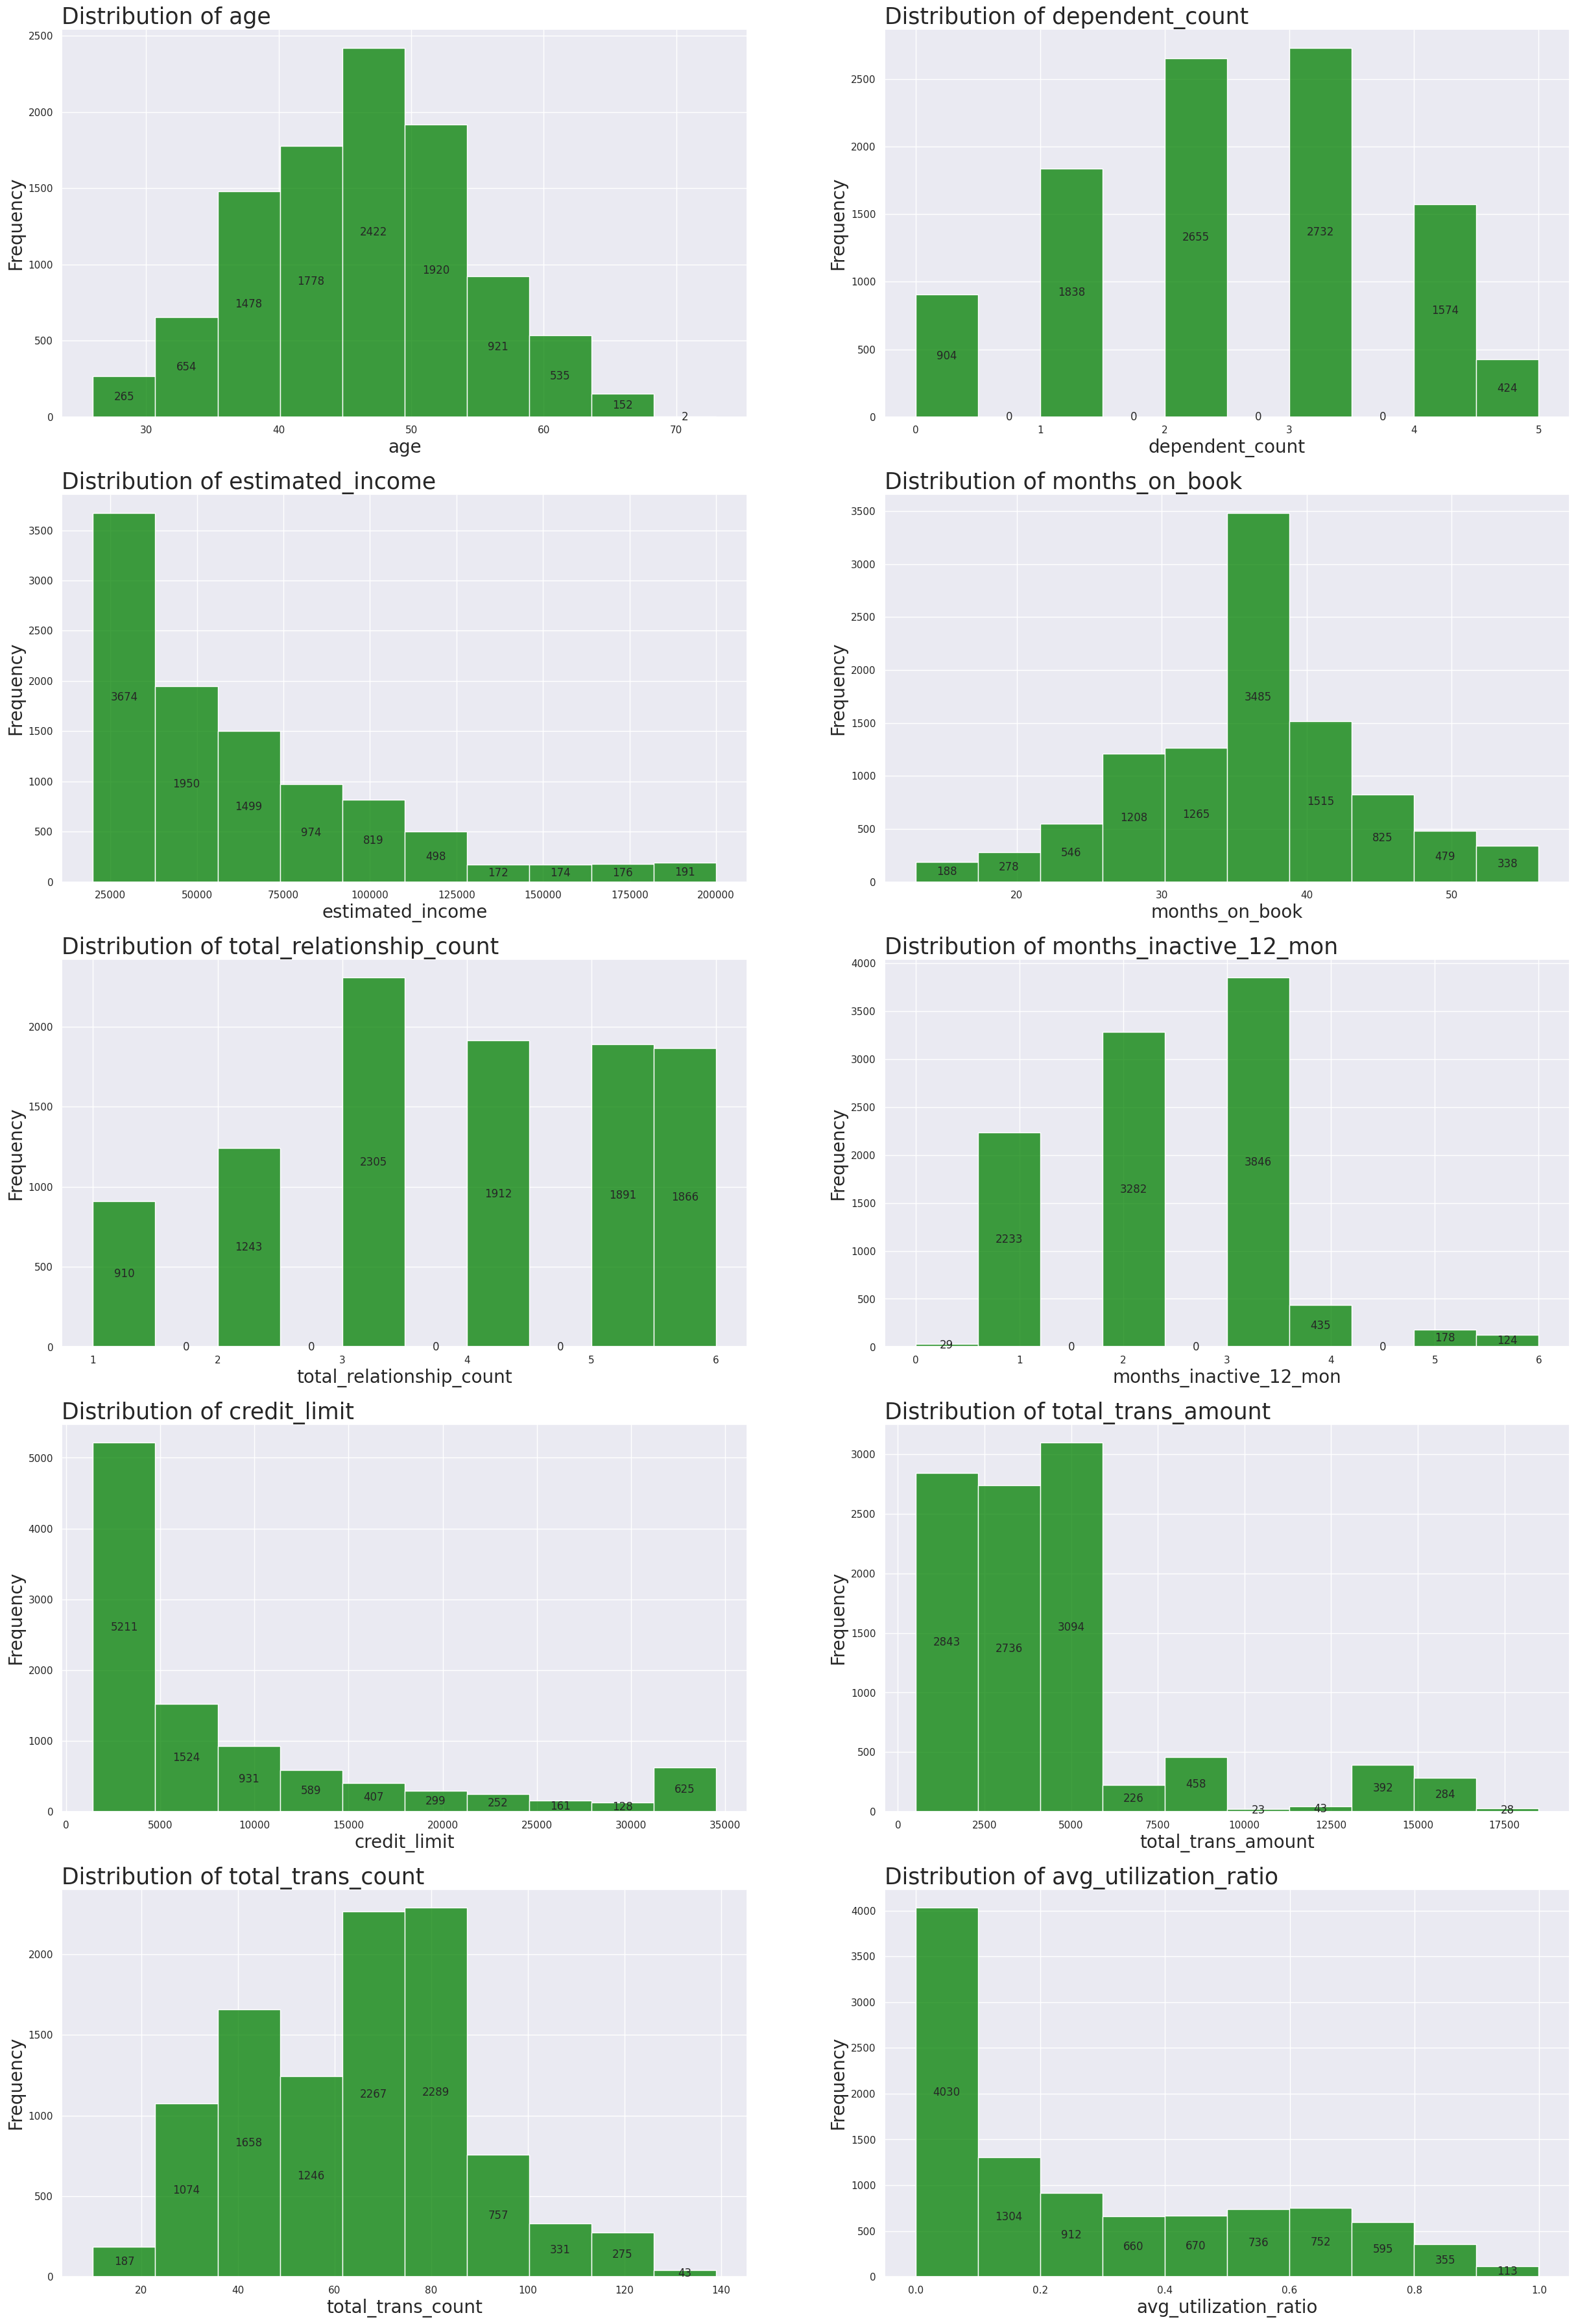

In [7]:
numeric_cols = ["age", "dependent_count", "estimated_income", "months_on_book", "total_relationship_count", "months_inactive_12_mon", "credit_limit", 
                "total_trans_amount", "total_trans_count", "avg_utilization_ratio"]
sns.set_theme()
fig = plt.figure(figsize=(30,45))

for idx, col in enumerate(numeric_cols):
    ax = plt.subplot(5, 2, idx+1)
    sns.histplot(x=customers[col], ax=ax, bins=10, color ='green')
    plt.title('Distribution of ' + col, loc='left', size=25)
    plt.ylabel('Frequency', size = 20)
    plt.xlabel(col, size = 20)
    #add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

Based on the data from the charts we can draw the first conclusions:
* The majority of clients are aged around 50 years
* Most of the clients have 2 to 3 children (it may be worth paying attention to these clients as having children implies additional expenses).
* The main part of clients have income up to 50 thousand
* Most clients have been using the card for 38-40 months
* Clients spend mostly up to 6 thousand dollars in total
* Clients apply to the company on average 3-4 times
* The majority of clients have a credit limit of up to 5 thousand dollars

## Feature Engineering


We start dealing with the categorical columns. There are three of them: gender, education level, and marital status.

First, let's check on the ```gender``` and ```education_level``` columns.

The gender column contains only 2 unique values, "M" and "F", which means it's possible to replace all the rows with 1 and 0.

The ```education_level``` column contains 6 unique values. This column represents levels of education, and it's possible to rank the levels from the lowest to the highest, so it's possible to replace each unique level with a number, assuming we respect the order.

In [8]:
customers_modif = customers.copy()

#Replace the values in the gender column
customers_modif['gender'] = customers_modif['gender'].apply(lambda x: 1 if x=='M' else 0)
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [9]:
customers_modif['marital_status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [10]:
#Replace the values in the education_level column
mapping = {'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 3,
           'Post-Graduate': 4, 'Doctorate': 5}
customers_modif['education_level'] = customers_modif['education_level'].map(mapping)
customers_modif.head()    

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,65000,21,5,1,4716.0,816,28,0.000


In [11]:
#Replace the values in the marital_status column with one-hot-encoding
customers_modif = pd.get_dummies(data = customers_modif, columns = ['marital_status'], drop_first = True
                                )

In [12]:
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0


## Scaling the Data

Note that we have different scaled data across the DataFrame. The ```estimated_income```, for instance, contains numbers in the range of dozens and hundreds of thousands, while the ```dependent_count``` column contains numbers from 1 to 5.
We need to transform the data so it's all on the same scale.

In [13]:
customers_scaled = customers_modif.drop('customer_id', axis=1)
customers_scaled.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0


In [14]:
customers_scaled.columns

Index(['age', 'gender', 'dependent_count', 'education_level',
       'estimated_income', 'months_on_book', 'total_relationship_count',
       'months_inactive_12_mon', 'credit_limit', 'total_trans_amount',
       'total_trans_count', 'avg_utilization_ratio', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown'],
      dtype='object')

In [15]:
def scaler(df):
    scaler = StandardScaler()
    scaler.fit(df)
    df_scaled = scaler.transform(df)
    return df_scaled

scaled = scaler(customers_scaled)


In [16]:
scaled

array([[-0.16540558,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867, ..., -0.92821381,
         1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       ...,
       [-0.29014957, -0.9434357 , -1.03646242, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [-2.03656544,  1.05995565, -0.26654715, ..., -0.92821381,
        -0.79850685,  3.53845931],
       [-0.41489356, -0.9434357 , -0.26654715, ...,  1.07733799,
        -0.79850685, -0.28260887]])

In [17]:
customers_scaled = pd.DataFrame(scaled, columns = ['age', 'gender', 'dependent_count', 'education_level',
       'estimated_income', 'months_on_book', 'total_relationship_count',
       'months_inactive_12_mon', 'credit_limit', 'total_trans_amount',
       'total_trans_count', 'avg_utilization_ratio', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown'])
customers_scaled.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609


## Choosing K
We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization

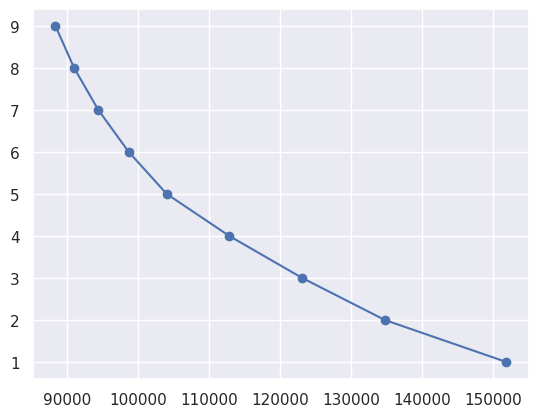

In [18]:
inertias = []
for i in range(1, 10):
    model = KMeans(n_clusters = i)
    clusters = model.fit_predict(customers_scaled)
    inertias.append(model.inertia_)
    
plt.plot(inertias, range(1, 10), marker='o')
plt.show()    
    

In [19]:
len(inertias)

9

Let's check percentage loss of inertia

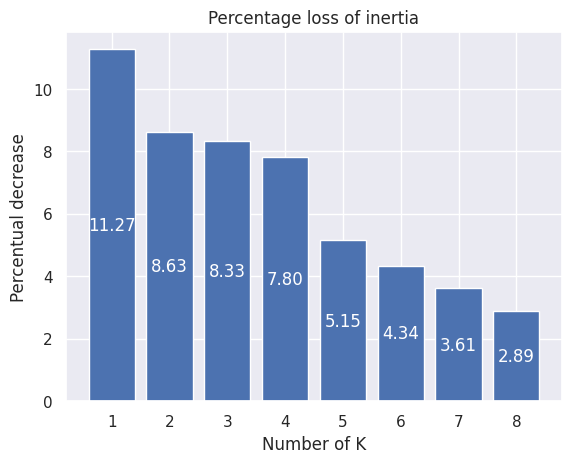

[11.266548393945648,
 8.633044840229589,
 8.334526293537495,
 7.8048991426090355,
 5.145975965544466,
 4.338835905334657,
 3.6121144106962215,
 2.886891707246005]

In [20]:
def percantage_loss(value):
    percantage = []
    for i in range(1,9):
        percentage_loss = 100 * (value[i-1] - value[i]) / value[i-1]
        percantage.append(percentage_loss)
    fig, ax = plt.subplots()
    per = ax.bar(range(1,9), percantage)
    ax.set(ylabel = 'Percentual decrease', xlabel = 'Number of K', title = 'Percentage loss of inertia')
    ax.bar_label(per, labels=[f'{x:,.2f}' for x in per.datavalues], label_type='center', color = 'white')
    plt.show()
    return percantage
percantage_loss(inertias)


It is difficult to conclude from the graph what number of clusters to choose. Perhaps reducing the data will help to get the right value. Let's use out insight from correlations heatmap that we draw above and keep several columns.

In [21]:
cols_to_keep = ['age', 'education_level',
       'estimated_income', 'months_on_book', 'credit_limit', 'avg_utilization_ratio', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown']
customers_scaled = customers_scaled[cols_to_keep]

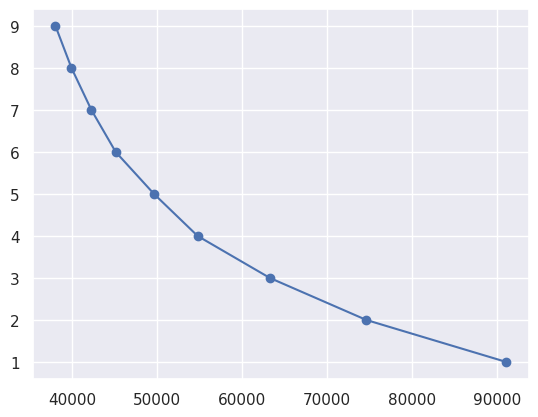

In [22]:
inertias = []
for i in range(1, 10):
    model = KMeans(n_clusters = i)
    clusters = model.fit_predict(customers_scaled)
    inertias.append(model.inertia_)
    
plt.plot(inertias, range(1, 10), marker='o')
plt.show()

Let's check percentage loss of inertia again

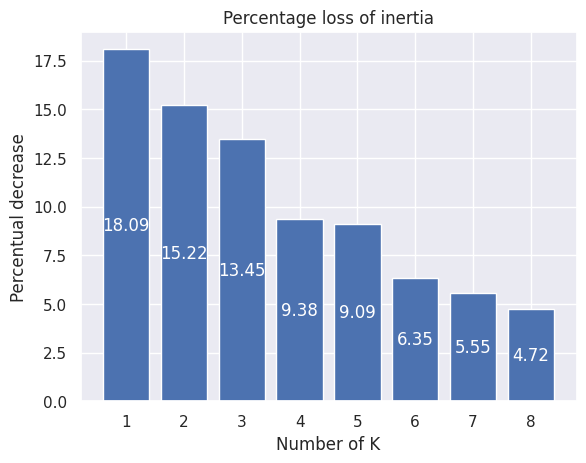

[18.085672127282795,
 15.221696480346308,
 13.449901539958189,
 9.377053339398264,
 9.094391540781057,
 6.345821603128643,
 5.55159693054318,
 4.722639463586933]

In [23]:
percantage_loss(inertias)

As we can see the picture has not changed much, although in the last graph the drop between clusters 3 and 4 is slightly larger. In the first case the difference was 1%, now it is 4%. In this case, it is recommended to use the number of clusters equal to 4


In [24]:
model = KMeans(n_clusters = 4)
clusters = model.fit_predict(customers_scaled)
print(clusters, model.inertia_, model.cluster_centers_,
      model.n_iter_,model.n_features_in_,model.feature_names_in_)

[1 0 1 ... 1 2 1] 54781.685286191765 [[-3.56703055e-02 -2.14113833e-03 -3.11721719e-01 -3.10794919e-02
  -3.44648646e-01  1.19272294e-01 -9.28213813e-01  1.25233740e+00
  -2.82608874e-01]
 [ 2.29742342e-02  2.23986989e-02 -2.75046147e-01  2.23758326e-02
  -3.96557845e-01  2.08541693e-01  8.27258047e-01 -7.98506854e-01
  -2.82608874e-01]
 [-9.44563944e-02 -4.09465944e-03  8.96038870e-04 -9.25145320e-02
   8.94916522e-02 -6.89029605e-02 -9.28213813e-01 -7.98506854e-01
   3.53845931e+00]
 [ 5.22970450e-02 -5.61162865e-02  1.39810169e+00  4.37431968e-02
   1.76211513e+00 -7.90731503e-01  1.17720273e-02  5.20912915e-02
  -2.82608874e-01]] 35 9 ['age' 'education_level' 'estimated_income' 'months_on_book'
 'credit_limit' 'avg_utilization_ratio' 'marital_status_Married'
 'marital_status_Single' 'marital_status_Unknown']


## Analyzing Results
All that's left now is to analyze the results. We need to see how the variables used in the clusterization differ from cluster to cluster in order better explain what each cluster represents.

We should note the most important characteristics of each cluster and how they can impact the business and marketing strategies for each type of customer.

In [25]:
customers['Cluster'] = clusters+1
customers['Cluster'].value_counts()

2    4491
1    3273
4    1614
3     749
Name: Cluster, dtype: int64

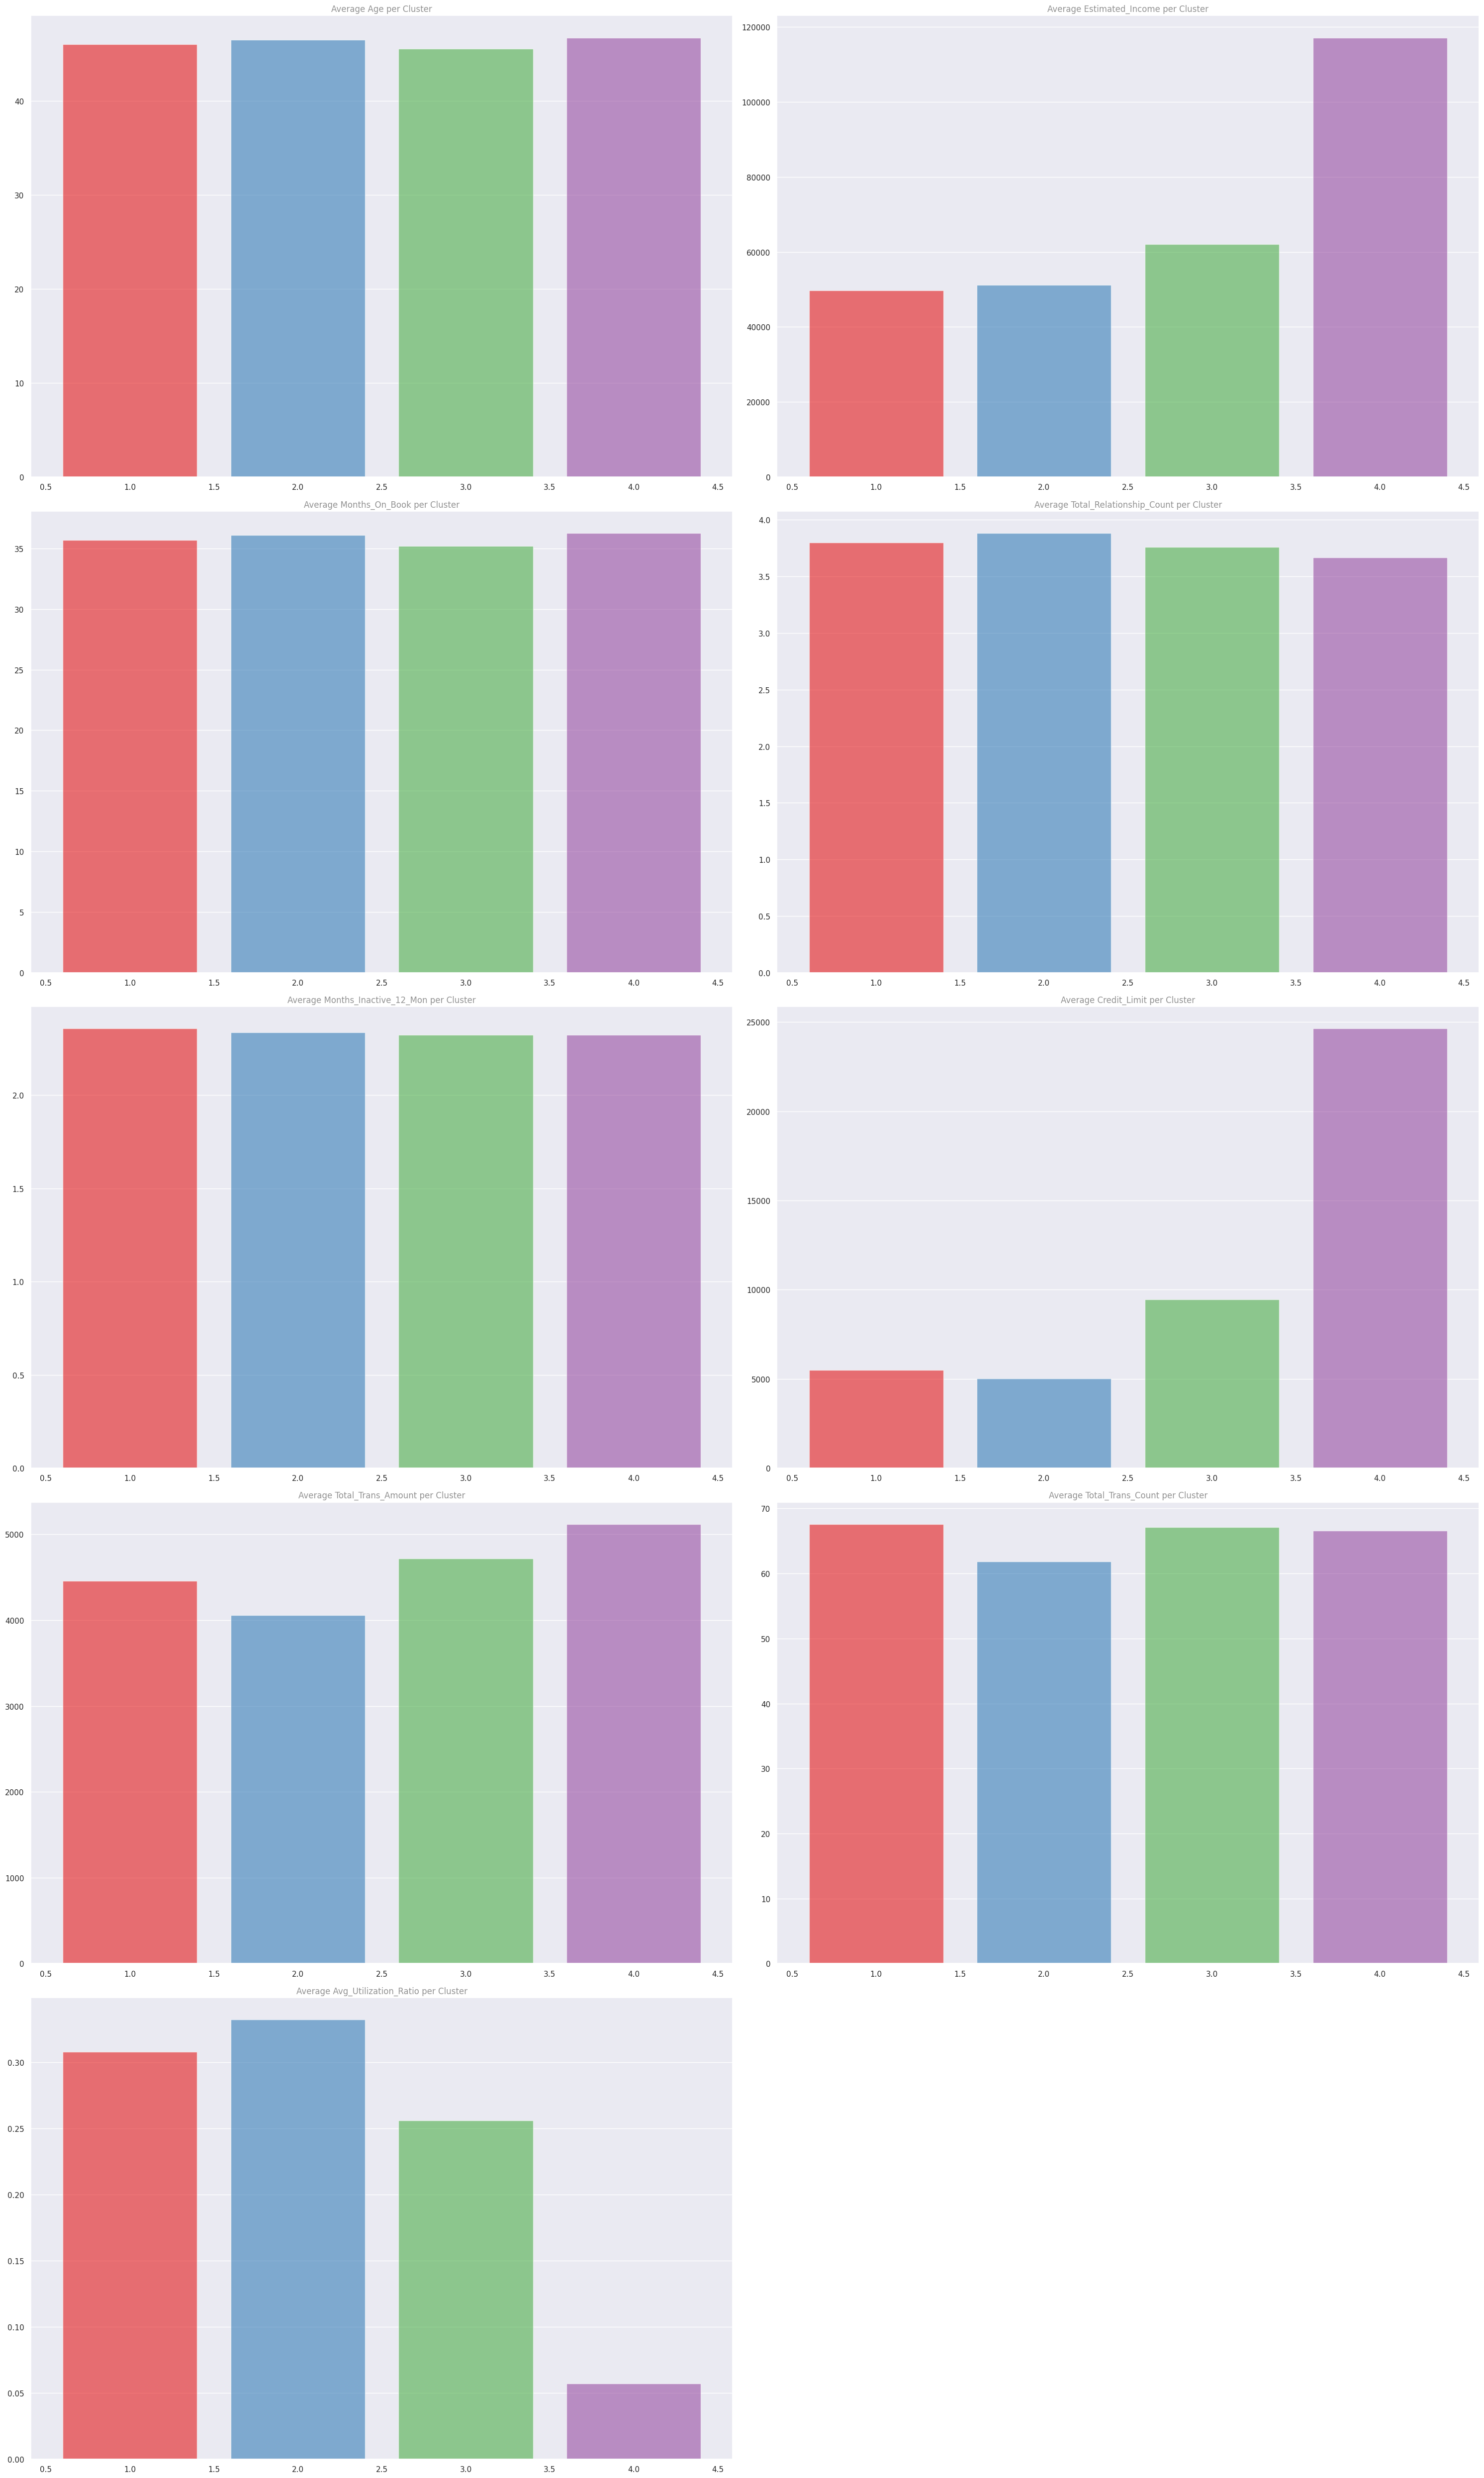

In [26]:
#Group each numeric variable by the CLUSTER column and plot a bar chart
numeric_columns = ['age', 'estimated_income', 'months_on_book','total_relationship_count',
                  'months_inactive_12_mon', 'credit_limit', 'total_trans_amount', 'total_trans_count',
                  'avg_utilization_ratio']

fig = plt.figure(figsize=(30, 50))
for i, column in enumerate(numeric_columns):
    df_plot = customers.groupby('Cluster')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

The ```estimated_income``` is higher in cluster 4, also as a ```Total_trans_amount``` and ```credit_limit```, but ```utilization_ratio``` is very low


Perhaps for this customers from cluster 4, it is worth developing a product with special bonuses when using a credit card. For example, bonuses from airlines or bonuses from stores, as well as possible to add cashback for using the card.

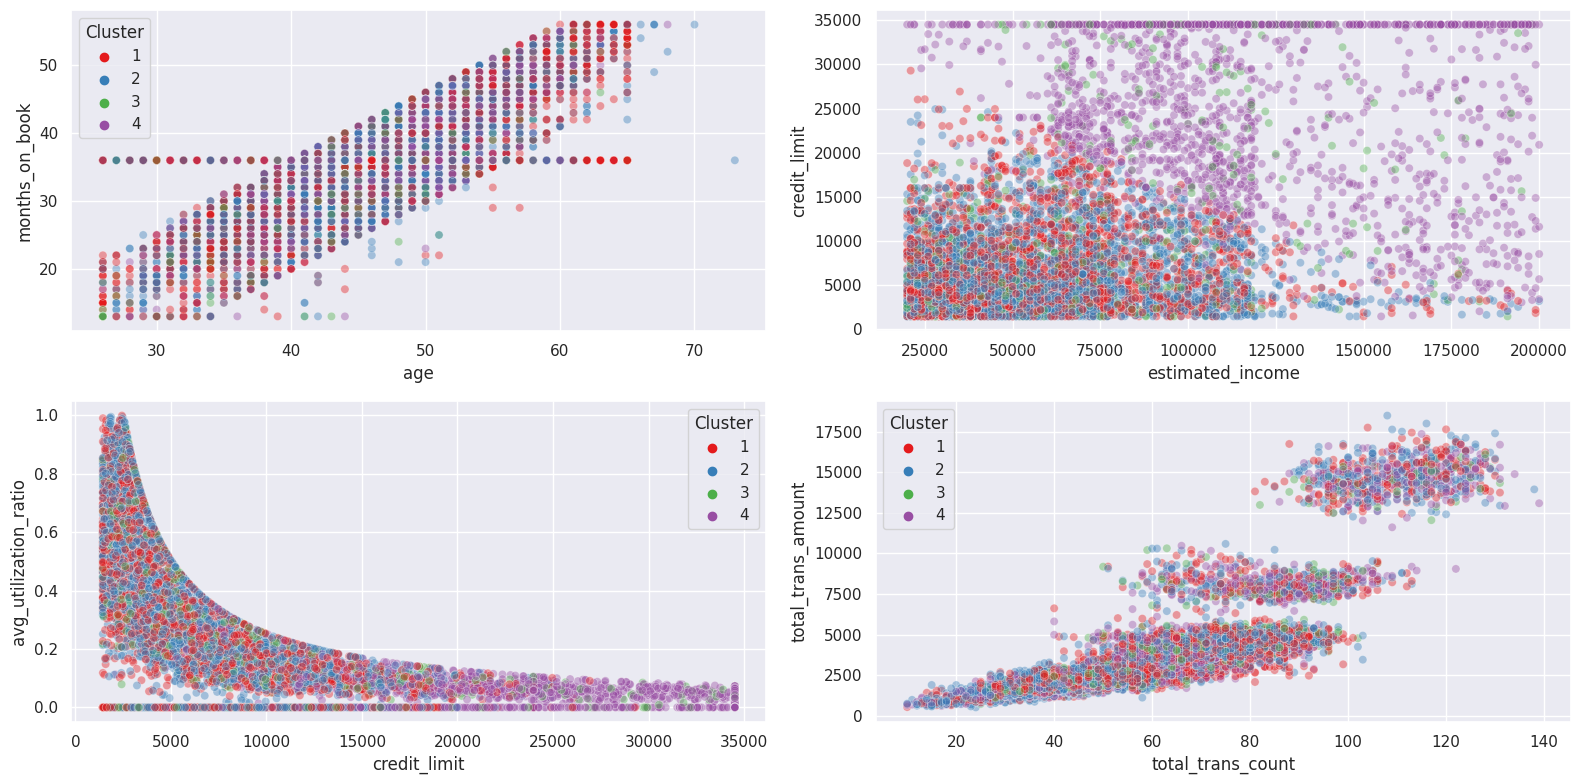

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))

sns.scatterplot(x='age', y='months_on_book', hue='Cluster', data=customers, palette='Set1', alpha=0.4, ax=ax1)

sns.scatterplot(x='estimated_income', y='credit_limit', hue='Cluster', data=customers, palette='Set1', alpha=0.4, ax=ax2, legend=False)

sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='Cluster', data=customers, palette='Set1', alpha=0.4, ax=ax3)

sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='Cluster', data=customers, palette='Set1', alpha=0.4, ax=ax4)

plt.tight_layout()
plt.show()


/tmp/ipykernel_28224/1925967216.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


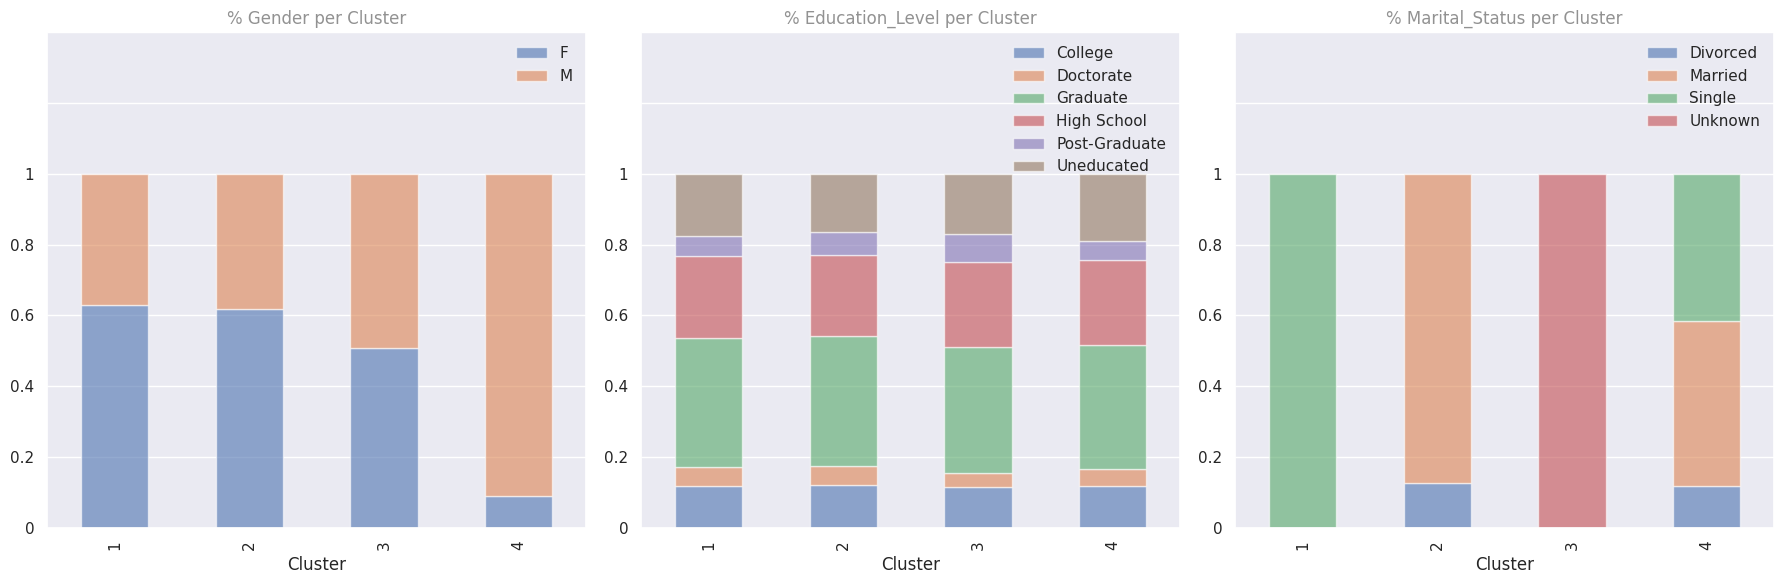

In [28]:
#calculate the percentual distribution of each variable per cluster for the categorical columns
cat_columns = customers.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=customers['Cluster'], columns=customers[col], values=customers[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

By education level, all segments are normally distributed. Cluster 1 is completely single while in Cluter 3 marital status is 'Unknown'. Cluster 4 is almost composed of man.

## Conclusion

## Cluster 1
**Сustomers**: Mostly single women. Low credit limit, high utilization rating, low income. 

**Suggestion** : Credit limit increase and additional bonuses for large purchases

## Cluster 2
**Сustomers**: Mostly  maried women. Low credit limit, high utilization rating, high number of transaction, low income. 

**Suggestion** : Credit limit increase, cashback for purchases in supermarkets, possible additional bonuses for travel and vacations

## Cluster 3
**Сustomers**: Men and women, average credit limit, high utilization rating and high number of transaction, average income 

**Suggestion** : Credit limit bit increase

## Cluster 4
**Сustomers**: Mostly  men. High credit limit, low utilization rating, high number of transaction, high income. 

**Suggestion** : it is worth developing a product with special bonuses when using a credit card. For example, bonuses from airlines or bonuses from stores, as well as possible to add cashback for using the card, maybe suggest VIP service

### Additional data may be needed to better select the number of clusters and to select a strategy for each cluster. For example, clients' credit history, real estate and asset ownership. Overall employment history and job stability.